In [47]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [62]:
CWD = os.getcwd()

In [63]:
aapl_csv_path = os.path.join(CWD, 'AAPL.csv')
df = pd.read_csv(aapl_csv_path)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [64]:
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')
# For each month, find the high, low, open, and close values
df['MonthHigh'] = df.groupby('YearMonth')['High'].transform('max')
df['MonthLow'] = df.groupby('YearMonth')['Low'].transform('min')
df['MonthOpen'] = df.groupby('YearMonth')['Open'].transform('first')
df['MonthClose'] = df.groupby('YearMonth')['Close'].transform('last')
df

,Date,Open,High,Low,Close,Adj Close,Volume,YearMonth,MonthHigh,MonthLow,MonthOpen,MonthClose
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400,1980-12,0.645089,0.450893,0.513393,0.609375
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200,1980-12,0.645089,0.450893,0.513393,0.609375
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000,1980-12,0.645089,0.450893,0.513393,0.609375
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400,1980-12,0.645089,0.450893,0.513393,0.609375
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400,1980-12,0.645089,0.450893,0.513393,0.609375
...,...,...,...,...,...,...,...,...,...,...,...,...
9904,2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800,2020-03,304.000000,212.610001,282.279999,254.289993
9905,2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200,2020-03,304.000000,212.610001,282.279999,254.289993
9906,2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100,2020-03,304.000000,212.610001,282.279999,254.289993
9907,2020-03-31,255.600006,262.489990,252.000000,254.289993,254.289993,49250500,2020-03,304.000000,212.610001,282.279999,254.289993


In [65]:
# Calculate EMA for Close, Open, High, Low with different periods (e.g., 12, 26, 50)
df['EMA_12_Close'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26_Close'] = df['Close'].ewm(span=26, adjust=False).mean()
df['EMA_50_Close'] = df['Close'].ewm(span=50, adjust=False).mean()

# df['EMA_12_Open'] = df['Open'].ewm(span=12, adjust=False).mean()
# df['EMA_26_Open'] = df['Open'].ewm(span=26, adjust=False).mean()
# df['EMA_50_Open'] = df['Open'].ewm(span=50, adjust=False).mean()

# df['EMA_12_High'] = df['High'].ewm(span=12, adjust=False).mean()
# df['EMA_26_High'] = df['High'].ewm(span=26, adjust=False).mean()
# df['EMA_50_High'] = df['High'].ewm(span=50, adjust=False).mean()

# df['EMA_12_Low'] = df['Low'].ewm(span=12, adjust=False).mean()
# df['EMA_26_Low'] = df['Low'].ewm(span=26, adjust=False).mean()
# df['EMA_50_Low'] = df['Low'].ewm(span=50, adjust=False).mean()

# Show the resulting dataframe with the EMA features
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,YearMonth,MonthHigh,MonthLow,MonthOpen,MonthClose,EMA_12_Close,EMA_26_Close,EMA_50_Close
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400,1980-12,0.645089,0.450893,0.513393,0.609375,0.513393,0.513393,0.513393
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200,1980-12,0.645089,0.450893,0.513393,0.609375,0.509272,0.511409,0.512342
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000,1980-12,0.645089,0.450893,0.513393,0.609375,0.500291,0.506926,0.509933
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400,1980-12,0.645089,0.450893,0.513393,0.609375,0.494408,0.503602,0.508055
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400,1980-12,0.645089,0.450893,0.513393,0.609375,0.491491,0.501517,0.506776


In [81]:
# Group by the month and year, then aggregate
monthly_df = df.groupby(df['Date'].dt.to_period('M')).agg({
    'Open': 'first',    # The first Open price of the month
    'High': 'max',      # The highest price (High) of the month
    'Low': 'min',       # The lowest price (Low) of the month
    'Close': 'last',    # The last Close price of the month
    'EMA_12_Close': 'last',   # The last EMA_12_Close of the month
    'EMA_26_Close': 'last',   # The last EMA_26_Close of the month
    'EMA_50_Close': 'last',   # The last EMA_50_Close of the month
    'Volume': 'mean'
    # 'EMA_12_Open': 'last',    # The last EMA_12_Open of the month
    # 'EMA_26_Open': 'last',    # The last EMA_26_Open of the month
    # 'EMA_50_Open': 'last',    # The last EMA_50_Open of the month
    # 'EMA_12_High': 'last',    # The last EMA_12_High of the month
    # 'EMA_26_High': 'last',    # The last EMA_26_High of the month
    # 'EMA_50_High': 'last',    # The last EMA_50_High of the month
    # 'EMA_12_Low': 'last',     # The last EMA_12_Low of the month
    # 'EMA_26_Low': 'last',     # The last EMA_26_Low of the month
    # 'EMA_50_Low': 'last'      # The last EMA_50_Low of the month
})

monthly_df.head()

,Open,High,Low,Close,EMA_12_Close,EMA_26_Close,EMA_50_Close,Volume
Date,,,,,,,,
1980-12,0.513393,0.645089,0.450893,0.609375,0.570987,0.543106,0.529194,2.586252e+07
1981-01,0.616071,0.620536,0.504464,0.504464,0.555220,0.557168,0.548359,7.249867e+06
1981-02,0.477679,0.515625,0.424107,0.473214,0.463067,0.485983,0.505423,4.231832e+06
1981-03,0.475446,0.482143,0.386161,0.437500,0.448054,0.452882,0.469672,7.962691e+06
1981-04,0.435268,0.524554,0.433036,0.506696,0.497667,0.485188,0.481215,6.392000e+06


In [84]:
monthly_df['EMA_Signal'] = (monthly_df['EMA_12_Close'] > monthly_df['EMA_50_Close'])*1
monthly_df

,Open,High,Low,Close,EMA_12_Close,EMA_26_Close,EMA_50_Close,Volume,EMA_Signal
Date,,,,,,,,,
1980-12,0.513393,0.645089,0.450893,0.609375,0.570987,0.543106,0.529194,2.586252e+07,1
1981-01,0.616071,0.620536,0.504464,0.504464,0.555220,0.557168,0.548359,7.249867e+06,1
1981-02,0.477679,0.515625,0.424107,0.473214,0.463067,0.485983,0.505423,4.231832e+06,0
1981-03,0.475446,0.482143,0.386161,0.437500,0.448054,0.452882,0.469672,7.962691e+06,0
1981-04,0.435268,0.524554,0.433036,0.506696,0.497667,0.485188,0.481215,6.392000e+06,1
...,...,...,...,...,...,...,...,...,...
2019-12,267.269989,293.970001,256.290009,293.649994,284.316401,276.291102,265.125851,2.843803e+07,1
2020-01,296.239990,327.850006,292.750000,309.510010,315.156815,306.845846,292.521680,3.493298e+07,1
2020-02,304.299988,327.220001,256.369995,273.359985,299.038920,305.817979,300.981259,3.973488e+07,0


In [85]:
# Shift the Close column to create a new feature for the next month's Close
monthly_df['Next_Month_Close'] = monthly_df['Close'].shift(-1)
monthly_df

,Open,High,Low,Close,EMA_12_Close,EMA_26_Close,EMA_50_Close,Volume,EMA_Signal,Next_Month_Close
Date,,,,,,,,,,
1980-12,0.513393,0.645089,0.450893,0.609375,0.570987,0.543106,0.529194,2.586252e+07,1,0.504464
1981-01,0.616071,0.620536,0.504464,0.504464,0.555220,0.557168,0.548359,7.249867e+06,1,0.473214
1981-02,0.477679,0.515625,0.424107,0.473214,0.463067,0.485983,0.505423,4.231832e+06,0,0.437500
1981-03,0.475446,0.482143,0.386161,0.437500,0.448054,0.452882,0.469672,7.962691e+06,0,0.506696
1981-04,0.435268,0.524554,0.433036,0.506696,0.497667,0.485188,0.481215,6.392000e+06,1,0.591518
...,...,...,...,...,...,...,...,...,...,...
2019-12,267.269989,293.970001,256.290009,293.649994,284.316401,276.291102,265.125851,2.843803e+07,1,309.510010
2020-01,296.239990,327.850006,292.750000,309.510010,315.156815,306.845846,292.521680,3.493298e+07,1,273.359985
2020-02,304.299988,327.220001,256.369995,273.359985,299.038920,305.817979,300.981259,3.973488e+07,0,254.289993


In [140]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Sort by Date
monthly_df.sort_values('Date', ascending=True, inplace=True)

# Feature columns: All columns except for 'Next_Month_Close'
features = monthly_df.drop(columns=['Next_Month_Close']).values

# Normalize the features (LSTM models typically perform better with scaled data)
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

# Target column: 'Next_Month_Close'
target = monthly_df['Next_Month_Close'].values
target_scaled = scaler.fit_transform(target.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, target_scaled, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(target_scaled[i + n_steps])
    return np.array(X), np.array(y)

# Use the last 5 months as input (n_steps=5)
n_steps = 6
X, y = create_sequences(features_scaled, target_scaled, n_steps)

# Reshape input to be 3D: [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

# Split the data into training and test sets (80% training, 20% testing)
train_size = int(len(X)*0.8)
X_train, X_test = X[:train_size], X[train_size:-1]
y_train, y_test = y[:train_size], y[train_size:-1]

# Build the LSTM model
model = Sequential()
model.add(LSTM(512, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
# model.add(Dropout(0.5))
model.add(LSTM(256, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(128, activation='relu'))  # Output layer for the next month's close price
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1)

# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Predict the next month's Close
predicted_close = model.predict(X_test)
print(f"Predicted Close for next month: {predicted_close[-1]}")
print(y_test[-1])


Epoch 1/500


c:\Users\yanka\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0016
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.1516e-04
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.5195e-04
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8.8312e-05
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.3842e-04
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.2045e-05
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 6.9473e-05
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.7447e-05
Epoch 9/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 6.2571e-05
Epoch 10/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.2739e-04
Epoch 11/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 5.9586e-05
Epoch 12/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5.0610e-05
Epoch 13/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.0938e-05
Epoch 14/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.7610e-05
Epoch 15/500
12/1

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


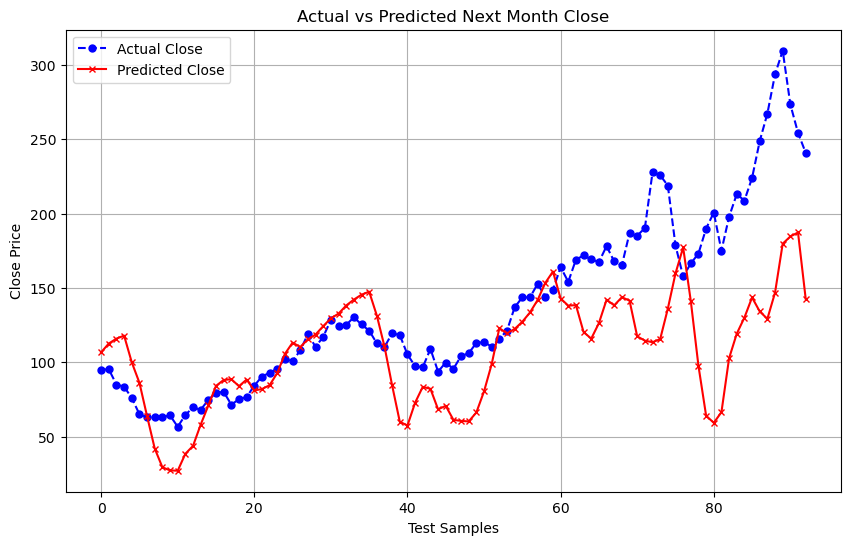

In [141]:
# Predict the next month's Close for the test set
predicted_close_scaled = model.predict(X_test)

# Inverse transform the predicted and actual values to get them back to the original scale
predicted_close = scaler.inverse_transform(predicted_close_scaled)
y_test_actual = scaler.inverse_transform(y_test)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Close', color='blue', linestyle='--', marker='o', markersize=5)
plt.plot(predicted_close, label='Predicted Close', color='red', linestyle='-', marker='x', markersize=5)
plt.title('Actual vs Predicted Next Month Close')
plt.xlabel('Test Samples')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


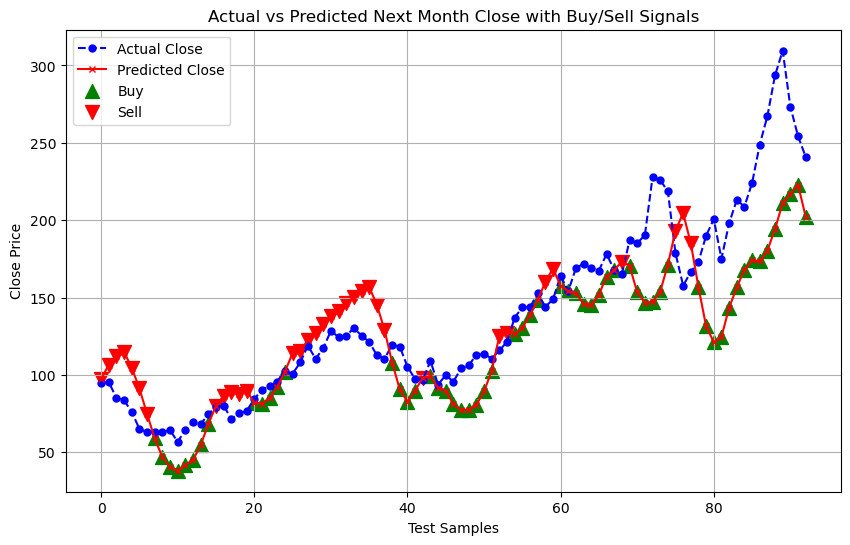

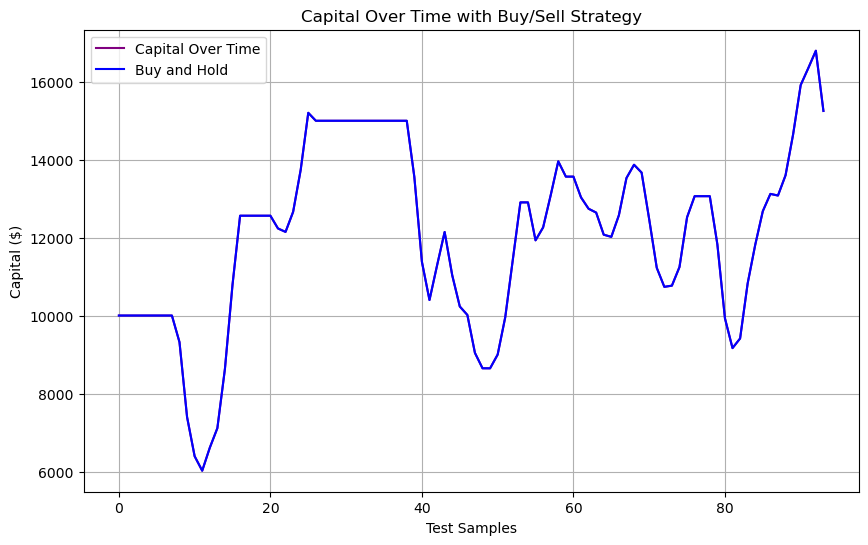

Sell Signal on sample 0: Actual Close = [95.0342865], Predicted Close = [97.47127]
Sell Signal on sample 1: Actual Close = [95.30000305], Predicted Close = [106.47207]
Sell Signal on sample 2: Actual Close = [85.04571533], Predicted Close = [112.31245]
Sell Signal on sample 3: Actual Close = [83.61142731], Predicted Close = [114.843216]
Sell Signal on sample 4: Actual Close = [76.02428436], Predicted Close = [104.5747]
Sell Signal on sample 5: Actual Close = [65.06999969], Predicted Close = [91.2264]
Sell Signal on sample 6: Actual Close = [63.05714417], Predicted Close = [74.70208]
Buy Signal on sample 7: Actual Close = [63.23714447], Predicted Close = [58.916203]
Buy Signal on sample 8: Actual Close = [63.25428391], Predicted Close = [46.770824]
Buy Signal on sample 9: Actual Close = [64.24714661], Predicted Close = [40.403343]
Buy Signal on sample 10: Actual Close = [56.64714432], Predicted Close = [38.0504]
Buy Signal on sample 11: Actual Close = [64.6471405], Predicted Close = [41

In [138]:
# Predict the next month's Close for the test set
predicted_close_scaled = model.predict(X_test)

# Inverse transform the predicted and actual values to get them back to the original scale
predicted_close = scaler.inverse_transform(predicted_close_scaled)
y_test_actual = scaler.inverse_transform(y_test)

# Now, we need the current month's Close or next month's Open for decision-making
# For this example, let's use current month's Close (monthly_df['Close'].values) or next month's Open
current_month_close = monthly_df['Close'].values[-len(X_test):]  # Assuming the Close for current month
next_month_open = monthly_df['Open'].shift(-1).values[-len(X_test):]  # Assuming the Open for next month

# Generate Buy/Sell signals based on current month's Close or next month's Open
buy_signals = current_month_close > predicted_close.flatten()  # Buy if current close is lower than predicted next close
sell_signals = current_month_close < predicted_close.flatten()  # Sell if current close is higher than predicted next close

# Simulating the trading strategy
initial_capital = 10000  # Starting capital
capital = initial_capital
shares = 0  # Number of shares owned

capital_over_time = [capital]  # To track the capital over time

for i in range(len(buy_signals)):
    if buy_signals[i] and capital > 0:  # Buy if there is capital
        # Buy as many shares as possible
        num_shares_to_buy = capital // current_month_close[i]
        capital -= num_shares_to_buy * current_month_close[i]  # Deduct cost of shares
        shares += num_shares_to_buy  # Add shares to portfolio
    elif sell_signals[i] and shares > 0:  # Sell if there are shares to sell
        # Sell all shares
        capital += shares * current_month_close[i]  # Add the proceeds to the capital
        shares = 0  # Reset shares to 0
    
    # Track capital over time
    capital_over_time.append((capital + shares * predicted_close[i])[0])  # Add value of shares to capital

# Plot the actual vs predicted values along with Buy/Sell signals
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Close', color='blue', linestyle='--', marker='o', markersize=5)
plt.plot(predicted_close, label='Predicted Close', color='red', linestyle='-', marker='x', markersize=5)

# Plot Buy and Sell signals
plt.scatter(np.where(buy_signals)[0], predicted_close[buy_signals], marker='^', color='green', label='Buy', s=100)
plt.scatter(np.where(sell_signals)[0], predicted_close[sell_signals], marker='v', color='red', label='Sell', s=100)

# Adding titles and labels
plt.title('Actual vs Predicted Next Month Close with Buy/Sell Signals')
plt.xlabel('Test Samples')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot the capital over time
plt.figure(figsize=(10, 6))
plt.plot(capital_over_time, label="Capital Over Time", color='purple')
plt.plot(capital_over_time, label="Buy and Hold", color='blue')
plt.title('Capital Over Time with Buy/Sell Strategy')
plt.xlabel('Test Samples')
plt.ylabel('Capital ($)')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, you can also print out the Buy/Sell signals with their corresponding dates or other details
for i in range(len(buy_signals)):
    if buy_signals[i]:
        print(f"Buy Signal on sample {i}: Actual Close = {y_test_actual[i]}, Predicted Close = {predicted_close[i]}")
    elif sell_signals[i]:
        print(f"Sell Signal on sample {i}: Actual Close = {y_test_actual[i]}, Predicted Close = {predicted_close[i]}")

Epoch 1/100


c:\Users\yanka\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0024
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.6033e-04
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5890e-04
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.1932e-05
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7338e-05 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.5745e-05
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.0092e-05
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.8300e-05
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.4008e-05 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.6212e-05
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.3668e-05
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.3656e-05
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.4821e-05 
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.2781e-05
Epoch 15/100
12/12 ━━━━━━━━━

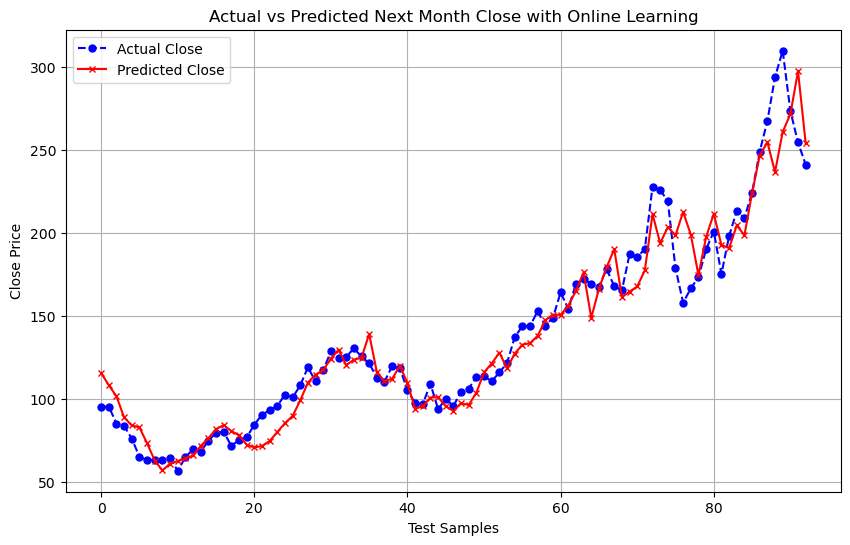

Buy Signal on sample 0: Actual Close = [95.0342865], Predicted Close = [115.49407]
Buy Signal on sample 1: Actual Close = [95.30000305], Predicted Close = [108.155624]
Buy Signal on sample 2: Actual Close = [85.04571533], Predicted Close = [101.468155]
Buy Signal on sample 3: Actual Close = [83.61142731], Predicted Close = [88.74215]
Buy Signal on sample 4: Actual Close = [76.02428436], Predicted Close = [83.92527]
Buy Signal on sample 5: Actual Close = [65.06999969], Predicted Close = [82.72824]
Buy Signal on sample 6: Actual Close = [63.05714417], Predicted Close = [73.22395]
Sell Signal on sample 7: Actual Close = [63.23714447], Predicted Close = [62.757854]
Sell Signal on sample 8: Actual Close = [63.25428391], Predicted Close = [56.81802]
Sell Signal on sample 9: Actual Close = [64.24714661], Predicted Close = [60.936855]
Buy Signal on sample 10: Actual Close = [56.64714432], Predicted Close = [62.482468]
Sell Signal on sample 11: Actual Close = [64.6471405], Predicted Close = [64

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Assuming the data has been preprocessed and is available in monthly_df
# Sort by Date
monthly_df.sort_values('Date', ascending=True, inplace=True)

# Feature columns: All columns except for 'Next_Month_Close'
features = monthly_df.drop(columns=['Next_Month_Close']).values

# Normalize the features (LSTM models typically perform better with scaled data)
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

# Target column: 'Next_Month_Close'
target = monthly_df['Next_Month_Close'].values
target_scaler = MinMaxScaler(feature_range=(0, 1))  # Create a separate scaler for the target
target_scaled = target_scaler.fit_transform(target.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, target_scaled, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(target_scaled[i + n_steps])
    return np.array(X), np.array(y)

# Use the last 6 months as input (n_steps=6)
n_steps = 6
X, y = create_sequences(features_scaled, target_scaled, n_steps)

# Reshape input to be 3D: [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

# Split the data into training and test sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
def build_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(LSTM(64, activation='relu'))
    model.add(Dense(32))  # Output layer for the next month's close price
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Initialize the model
model = build_model()

# Train the initial model on the first 80% of the data
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Initialize lists to store predictions and actual values for plotting
predictions = []
actual_values = []

print("*"*len(X_test))
# Now, for online learning, retrain and predict incrementally
for i in range(len(X_test)):
    print("*", end='')
    # Train on the data up to the current point
    X_train_updated = X_test[:i+1]
    y_train_updated = y_test[:i+1]
    
    # # Rebuild the model to avoid weights from being mixed up
    # model = build_model()
    
    # Retrain the model with the updated data
    model.fit(X_train_updated, y_train_updated, epochs=10, batch_size=32, verbose=0)  # Reduced epochs for quick updates

    # Predict the next point (test on the next point)
    prediction = model.predict(X_test[i:i+1], verbose=0)
    predictions.append(prediction[0][0])

    # Store actual value for comparison
    actual_values.append(y_test[i][0])

# Inverse transform the predicted and actual values to get them back to the original scale
predictions = target_scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
actual_values = target_scaler.inverse_transform(np.array(actual_values).reshape(-1, 1))

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual Close', color='blue', linestyle='--', marker='o', markersize=5)
plt.plot(predictions, label='Predicted Close', color='red', linestyle='-', marker='x', markersize=5)
plt.title('Actual vs Predicted Next Month Close with Online Learning')
plt.xlabel('Test Samples')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, you can also print out the Buy/Sell signals with their corresponding dates or other details
for i in range(len(predictions)):
    if actual_values[i] < predictions[i]:
        print(f"Buy Signal on sample {i}: Actual Close = {actual_values[i]}, Predicted Close = {predictions[i]}")
    elif actual_values[i] > predictions[i]:
        print(f"Sell Signal on sample {i}: Actual Close = {actual_values[i]}, Predicted Close = {predictions[i]}")


In [168]:
capital = 10000

leftover_cash = capital%actual_values[0][0]
num_shares = capital//actual_values[0][0]

print(f"Final capital: {leftover_cash+num_shares*actual_values[-2][0]}")

Final capital: 25316.95030212402


In [169]:
capital = 10000
num_shares = 0

for i in range(1,len(predictions)):
    if actual_values[i-1] > predictions[i]:
        if num_shares>0:
            print(f"Sold at {actual_values[i-1]}")
            capital += (num_shares*actual_values[i-1])[0]
            num_shares = 0
    else:
        num_shares_to_buy = capital//actual_values[i-1]
        if num_shares_to_buy>0:
            print(f"Bought at {actual_values[i-1]}")
            num_shares +=num_shares_to_buy
            capital -= (num_shares_to_buy*actual_values[i-1])[0]

(capital + num_shares*actual_values[-2])[0]

Bought at [95.0342865]
Sold at [63.05714417]
Bought at [56.64714432]
Sold at [75.17713928]
Bought at [108.]
Sold at [118.93000031]
Bought at [110.37999725]
Sold at [124.43000031]
Bought at [125.43000031]
Sold at [121.30000305]
Bought at [110.30000305]
Sold at [118.30000305]
Bought at [96.69000244]
Sold at [108.98999786]
Bought at [93.73999786]
Sold at [99.86000061]
Bought at [95.59999847]
Sold at [104.20999908]
Bought at [113.05000305]
Sold at [136.99000549]
Bought at [144.02000427]
Sold at [164.]
Bought at [154.11999512]
Sold at [171.8500061]
Bought at [167.42999268]
Sold at [167.77999878]
Bought at [190.28999329]
Sold at [227.63000488]
Bought at [178.58000183]
Sold at [200.66999817]
Bought at [175.07000732]
Sold at [213.03999329]
Bought at [208.74000549]
Sold at [267.25]
Bought at [273.35998535]
Sold at [254.28999329]
Bought at [240.91000366]


44318.610767364495